# Correlational Analysis

In [2]:
import pandas as pd
import numpy as np
import glob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

In [4]:
# 1. Load and Prepare the News Data
news_file_path = r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv'
news_df = pd.read_csv(news_file_path)
news_df['date'] = pd.to_datetime(news_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
news_df['date'] = news_df['date'].dt.date
news_df = news_df.dropna(subset=['date', 'headline'])
print("News Data Sample:")
print(news_df.head())

News Data Sample:
    Unnamed: 0                                           headline  \
10          10    30 Stocks Moving in Friday's Pre-Market Session   
11          11  SVB Leerink Maintains Outperform on Agilent Te...   
12          12  8 Stocks Moving In Thursday's After-Hours Session   
13          13  Agilent Technologies shares are trading higher...   
14          14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   

                                                  url  \
10  https://www.benzinga.com/news/20/05/16092879/3...   
11  https://www.benzinga.com/news/20/05/16092270/s...   
12  https://www.benzinga.com/news/20/05/16089803/8...   
13  https://www.benzinga.com/wiim/20/05/16089218/a...   
14  https://www.benzinga.com/news/earnings/20/05/1...   

                  publisher        date stock  
10               Lisa Levin  2020-05-22     A  
11  vishwanath@benzinga.com  2020-05-22     A  
12             Tyree Gorges  2020-05-21     A  
13        Benzinga Newsdesk  202

In [5]:
# 2. Perform Sentiment Analysis on News Headlines
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(headline):
    if isinstance(headline, str):
        return analyzer.polarity_scores(headline)['compound']
    else:
        return 0.0  # Neutral sentiment if headline is not a string

news_df['sentiment'] = news_df['headline'].apply(get_sentiment)
print("\nSentiment Scores Sample:")
print(news_df[['date', 'headline', 'sentiment']].head())

# 3. Aggregate Sentiment by Date
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'sentiment': 'average_sentiment'}, inplace=True)
print("\nAggregated Daily Sentiment:")
print(daily_sentiment.head())


Sentiment Scores Sample:
          date                                           headline  sentiment
10  2020-05-22    30 Stocks Moving in Friday's Pre-Market Session      0.000
11  2020-05-22  SVB Leerink Maintains Outperform on Agilent Te...      0.000
12  2020-05-21  8 Stocks Moving In Thursday's After-Hours Session      0.000
13  2020-05-21  Agilent Technologies shares are trading higher...      0.296
14  2020-05-21  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...      0.000

Aggregated Daily Sentiment:
         date  average_sentiment
0  2009-02-14            0.22630
1  2009-04-27            0.00000
2  2009-04-29            0.00000
3  2009-05-22            0.00000
4  2009-05-27            0.75105


In [6]:

# 4. Prepare Stock Data Files
stock_data_directory = r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data'
stock_files = glob.glob(stock_data_directory + '/*.csv')

expected_stock_files = 7
if len(stock_files) != expected_stock_files:
    print(f"Warning: Expected {expected_stock_files} stock data files, found {len(stock_files)} files.")

print("\nStock Files Found:")
for file in stock_files:
    print(file)


Stock Files Found:
C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\AAPL_historical_data.csv
C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\AMZN_historical_data.csv
C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\GOOG_historical_data.csv
C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\META_historical_data.csv
C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\MSFT_historical_data.csv
C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\NVDA_historical_data.csv
C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\TSLA_historical_data.csv


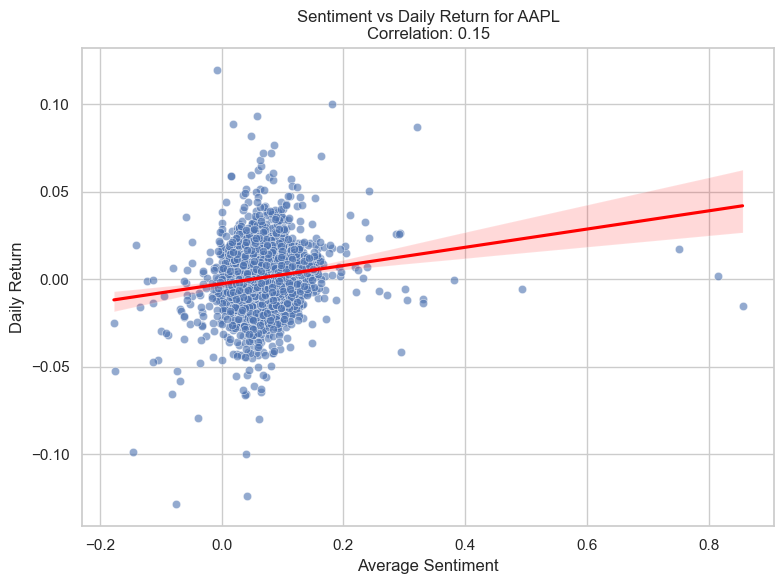

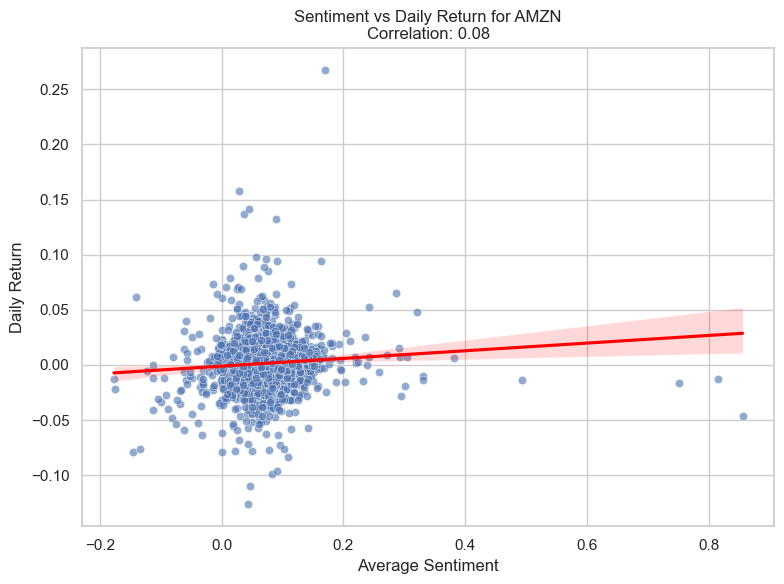

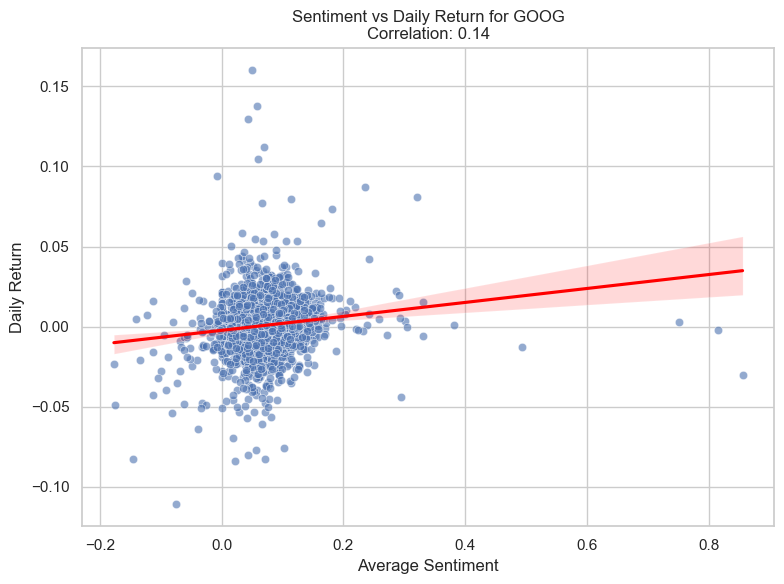

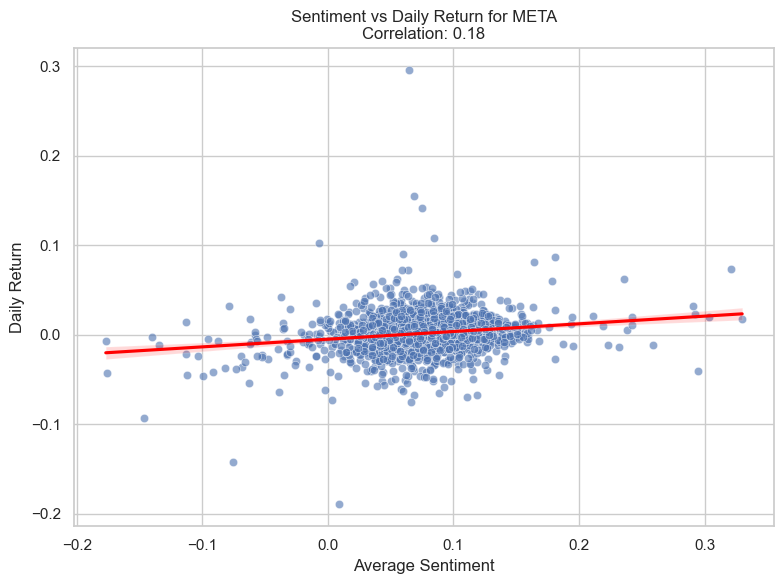

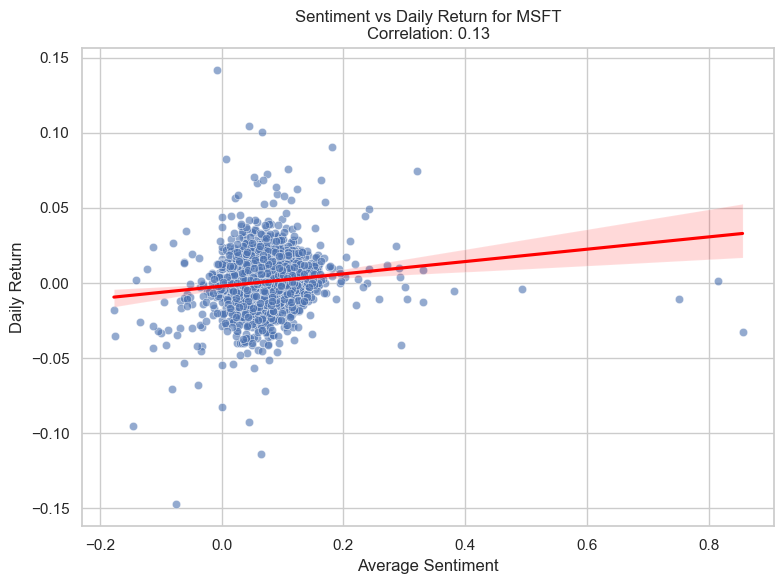

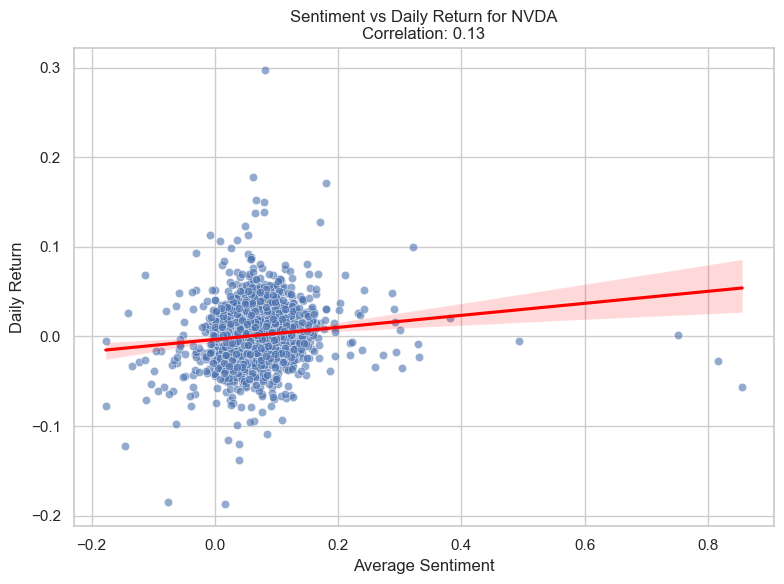

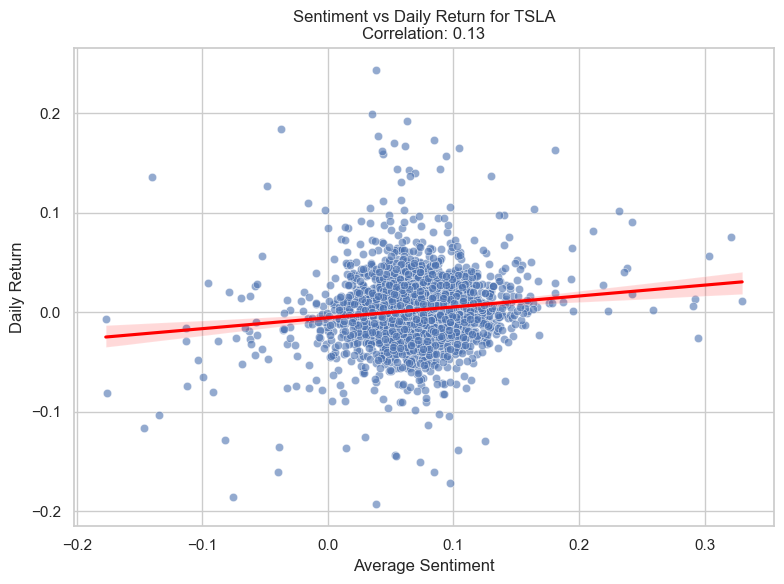

In [9]:
# 5. Iterate Through Each Stock File and Perform Correlation Analysis
correlation_results = []

# Iterate over each stock file in the list of stock files
for stock_file in stock_files:
    
    # Extract the stock name from the file path by splitting the path on the backslash,
    # taking the last part, and removing the '_historical_data.csv' suffix.
    stock_name = stock_file.split('\\')[-1].replace('_historical_data.csv', '')
    
    # Read the CSV file into a pandas DataFrame
    stock_df = pd.read_csv(stock_file)
    
    # Convert the 'Date' column to datetime format, specifying the format as 'YYYY-MM-DD'.
    # Use 'coerce' to handle any errors by setting invalid parsing to NaT (Not a Time).
    stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='%Y-%m-%d', errors='coerce')
    
    # Convert the 'Date' column to just the date part (dropping the time part)
    stock_df['Date'] = stock_df['Date'].dt.date
    
    # Drop any rows where 'Date' or 'Close' is NaN (missing values)
    stock_df = stock_df.dropna(subset=['Date', 'Close'])
    
    # Sort the DataFrame by the 'Date' column in ascending order
    stock_df = stock_df.sort_values(by='Date')
    
    # Calculate the daily return as the percentage change in the 'Close' price from the previous day
    stock_df['daily_return'] = stock_df['Close'].pct_change()
    
    # Drop any rows where 'daily_return' is NaN (e.g., the first row after pct_change, which has no previous value)
    stock_df = stock_df.dropna(subset=['daily_return'])
    
    # Merge the sentiment DataFrame 'daily_sentiment' with the stock DataFrame 'stock_df' on the 'date' column from 
    # 'daily_sentiment' and the 'Date' column from 'stock_df', keeping only rows that match in both DataFrames
    merged_df = pd.merge(daily_sentiment, stock_df, left_on='date', right_on='Date', how='inner')
    
    # Drop the 'Date' column from the merged DataFrame, as it's no longer needed
    merged_df = merged_df.drop(columns=['Date'])
    
    # Drop any rows where 'average_sentiment' or 'daily_return' is NaN
    merged_df = merged_df.dropna(subset=['average_sentiment', 'daily_return'])
    
    # Check if the merged DataFrame has less than 2 rows; if so, it's insufficient for correlation calculation
    if merged_df.shape[0] < 2:
        print(f"Not enough data to compute correlation for {stock_name}.")
        # Set the correlation value to NaN (Not a Number)
        correlation = np.nan
    else:
        # Calculate the correlation between 'average_sentiment' and 'daily_return' in the merged DataFrame
        correlation = merged_df['average_sentiment'].corr(merged_df['daily_return'])
    
    # Append the stock name and its correlation result to the list 'correlation_results'
    correlation_results.append({'stock': stock_name, 'correlation': correlation})

    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='average_sentiment', y='daily_return', data=merged_df, alpha=0.6)
    sns.regplot(x='average_sentiment', y='daily_return', data=merged_df, scatter=False, color='red')
    plt.title(f'Sentiment vs Daily Return for {stock_name}\nCorrelation: {correlation:.2f}')
    plt.xlabel('Average Sentiment')
    plt.ylabel('Daily Return')
    plt.tight_layout()
    plt.show()





Correlation Results:
  stock  correlation
0  AAPL     0.150656
1  AMZN     0.084680
2  GOOG     0.135329
3  META     0.177448
4  MSFT     0.130204
5  NVDA     0.125205
6  TSLA     0.130631


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_5104\521556327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stock', y='correlation', data=correlation_df, palette='viridis')


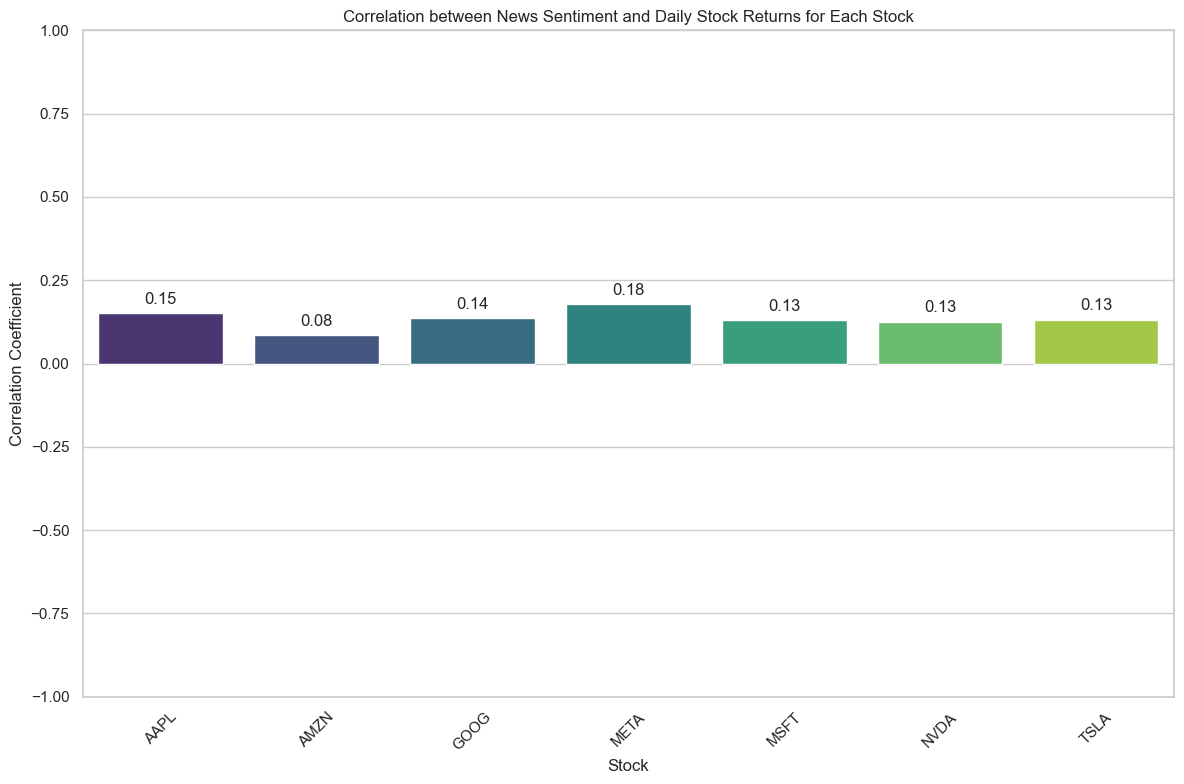

In [8]:

# 6. Create DataFrame for Correlation Results
correlation_df = pd.DataFrame(correlation_results)
print("\nCorrelation Results:")
print(correlation_df)

# 7. Visualize Correlation Results with a Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='stock', y='correlation', data=correlation_df, palette='viridis')
plt.title('Correlation between News Sentiment and Daily Stock Returns for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.ylim(-1, 1)

# Annotate each bar with its correlation value
for index, row in correlation_df.iterrows():
    plt.text(index, row['correlation'] + 0.02 * np.sign(row['correlation']), f"{row['correlation']:.2f}", 
             ha='center', va='bottom' if row['correlation'] >= 0 else 'top')

plt.tight_layout()
plt.show()